# 基于机器学习的收入预测系统

本Jupyter Notebook实现了一个完整的机器学习项目，使用UCI Adult数据集预测个人收入是否超过50K美元/年。

## 项目概述

本项目包含以下主要步骤：
1. 数据加载与初步探索
2. 数据预处理（处理缺失值、异常值和编码）
3. 探索性数据分析(EDA)
4. 特征工程
5. 模型训练与评估（逻辑回归、决策树、KNN）
6. 模型结果比较
7. 模型优化（网格搜索）
8. 优化后模型评估

## 环境要求
- Python 3.6+
- pandas, numpy, matplotlib, seaborn
- scikit-learn
- tqdm

## 导入必要的库
首先导入项目所需的所有Python库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, roc_curve, auc)
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

## 设置中文显示
确保matplotlib图表中的中文字符能够正确显示

In [2]:
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

## 1. 数据加载与初步探索
加载Adult数据集并查看基本信息

In [3]:
print("步骤1: 数据加载...")
df = pd.read_csv('adult_data.csv', header=None, na_values=' ?')

# 添加列名
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
           'marital_status', 'occupation', 'relationship', 'race', 'sex', 
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = columns

步骤1: 数据加载...


In [4]:
# 查看数据集基本信息
print(f"数据集形状: {df.shape}")
print("前5行数据:")
df.head()

数据集形状: (32561, 15)
前5行数据:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# 查看数据类型和缺失值情况
print("数据信息:")
df.info()

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 2. 数据预处理
处理缺失值、异常值，并对目标变量进行编码

In [6]:
print("步骤2: 数据预处理...")

# 处理缺失值
print("处理缺失值...")
print(f"处理前缺失值统计:{df.isnull().sum()}")
df = df.dropna()
print(f"处理后数据集形状: {df.shape}")

步骤2: 数据预处理...
处理缺失值...
处理前缺失值统计:age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64
处理后数据集形状: (30162, 15)


In [7]:
# 处理异常值
print("处理异常值...")
print(f"年龄范围: {df['age'].min()} - {df['age'].max()}")
print(f"工作时长范围: {df['hours_per_week'].min()} - {df['hours_per_week'].max()}")

# 筛选合理范围内的数据
df = df[(df['age'] >= 18) & (df['age'] <= 90)]
df = df[(df['hours_per_week'] >= 10) & (df['hours_per_week'] <= 80)]
print(f"处理后数据集形状: {df.shape}")

处理异常值...
年龄范围: 17 - 90
工作时长范围: 1 - 99
处理后数据集形状: (29373, 15)


In [8]:
# 目标变量编码
print("目标变量编码...")
print(f"编码前目标变量分布:{df['income'].value_counts()}")
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
print(f"编码后目标变量分布:{df['income'].value_counts()}")

目标变量编码...
编码前目标变量分布:income
<=50K    21952
>50K      7421
Name: count, dtype: int64
编码后目标变量分布:income
0    21952
1     7421
Name: count, dtype: int64


## 3. 探索性数据分析 (EDA)
通过可视化了解数据分布和特征关系

步骤3: 探索性数据分析 (EDA)...


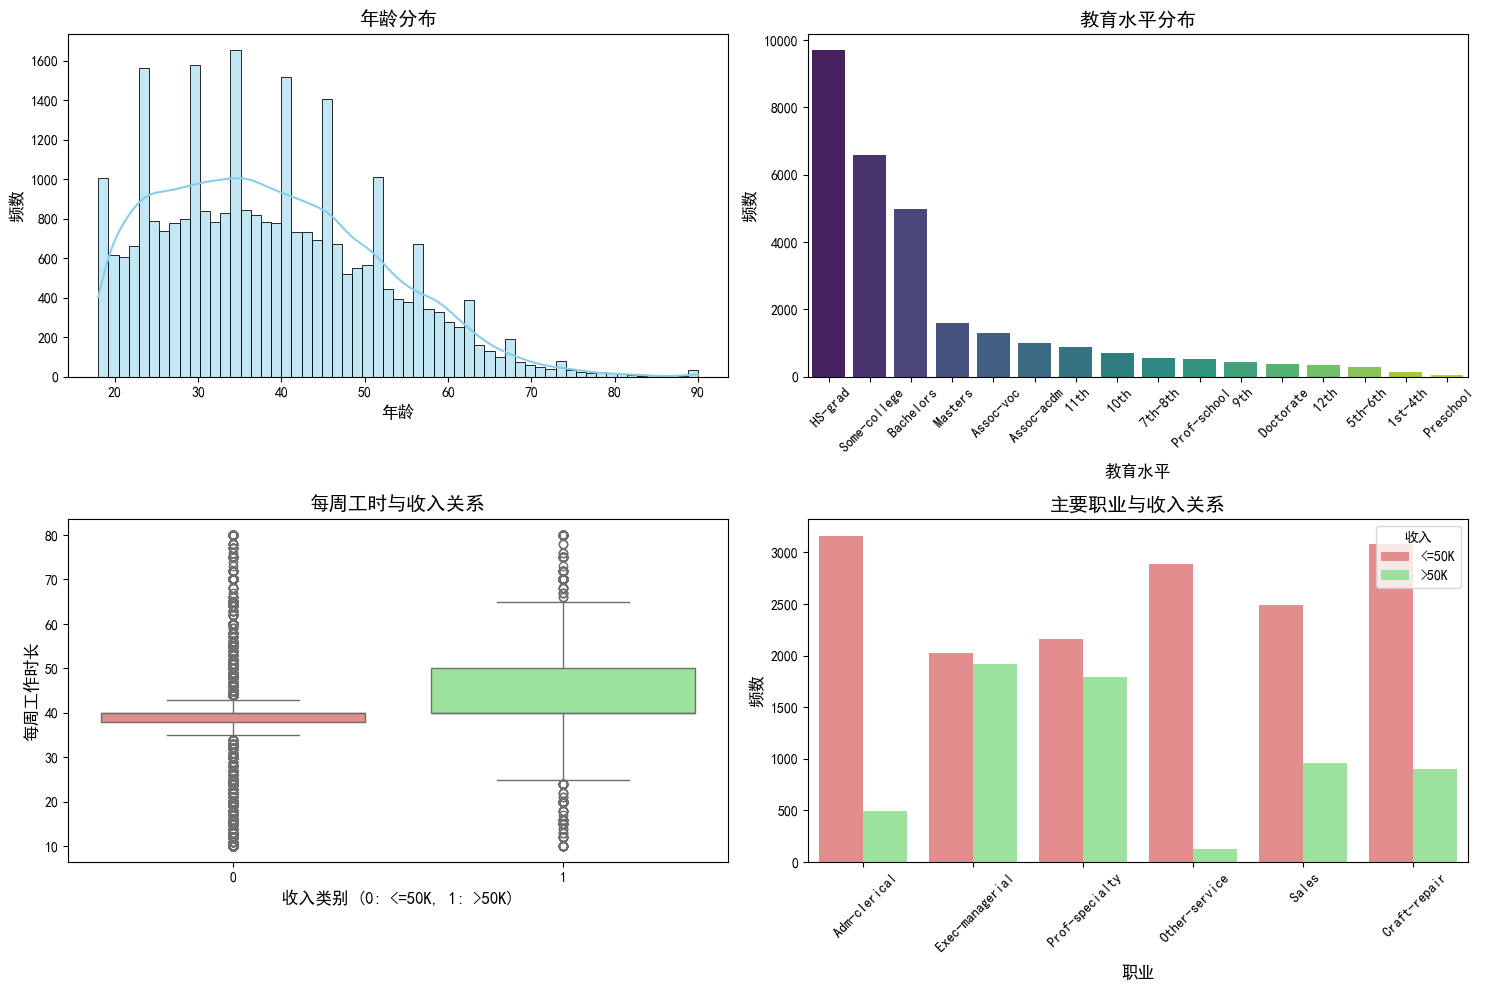

In [9]:
print("步骤3: 探索性数据分析 (EDA)...")

# 关键特征分布
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('年龄分布', fontsize=14)
plt.xlabel('年龄', fontsize=12)
plt.ylabel('频数', fontsize=12)

plt.subplot(2, 2, 2)
sns.countplot(x='education', data=df, order=df['education'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('教育水平分布', fontsize=14)
plt.xlabel('教育水平', fontsize=12)
plt.ylabel('频数', fontsize=12)

plt.subplot(2, 2, 3)
sns.boxplot(x='income', y='hours_per_week', data=df, palette=['lightcoral', 'lightgreen'])
plt.title('每周工时与收入关系', fontsize=14)
plt.xlabel('收入类别 (0: <=50K, 1: >50K)', fontsize=12)
plt.ylabel('每周工作时长', fontsize=12)

plt.subplot(2, 2, 4)
top_occupations = df['occupation'].value_counts().nlargest(6).index
df_top_occ = df[df['occupation'].isin(top_occupations)]
sns.countplot(x='occupation', hue='income', data=df_top_occ, palette=['lightcoral', 'lightgreen'])
plt.xticks(rotation=45)
plt.title('主要职业与收入关系', fontsize=14)
plt.xlabel('职业', fontsize=12)
plt.ylabel('频数', fontsize=12)
plt.legend(title='收入', labels=['<=50K', '>50K'])

plt.tight_layout()
plt.savefig('eda_results.png', dpi=300, bbox_inches='tight')
plt.show()

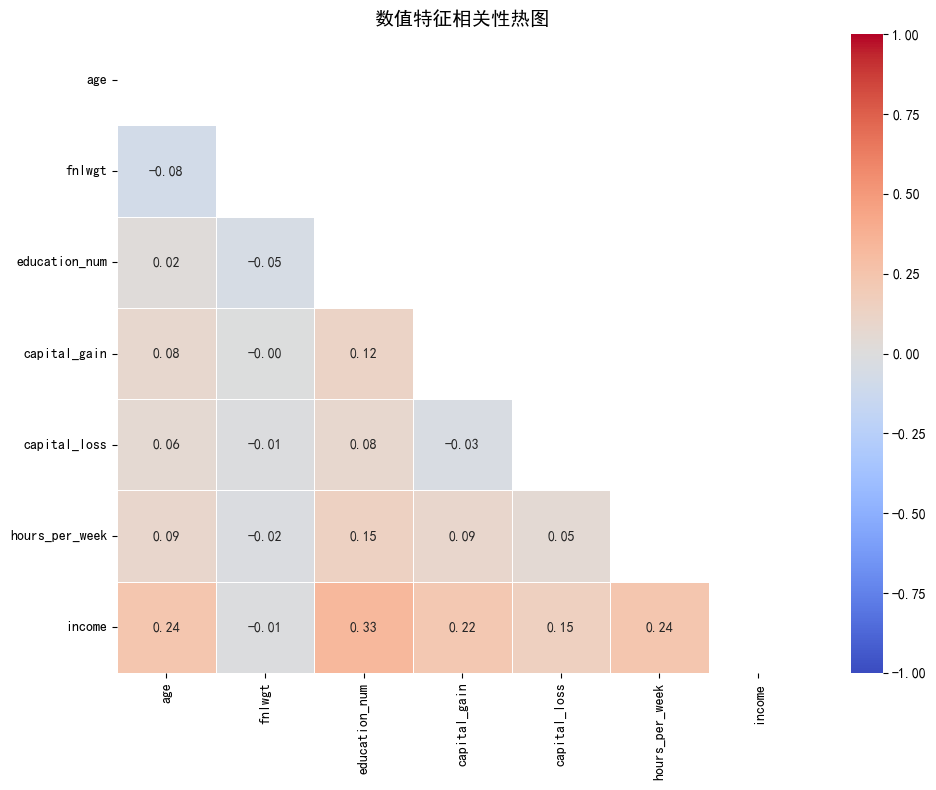

In [10]:
# 额外的EDA: 相关性分析
# 对数值型特征进行相关性分析
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('数值特征相关性热图', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

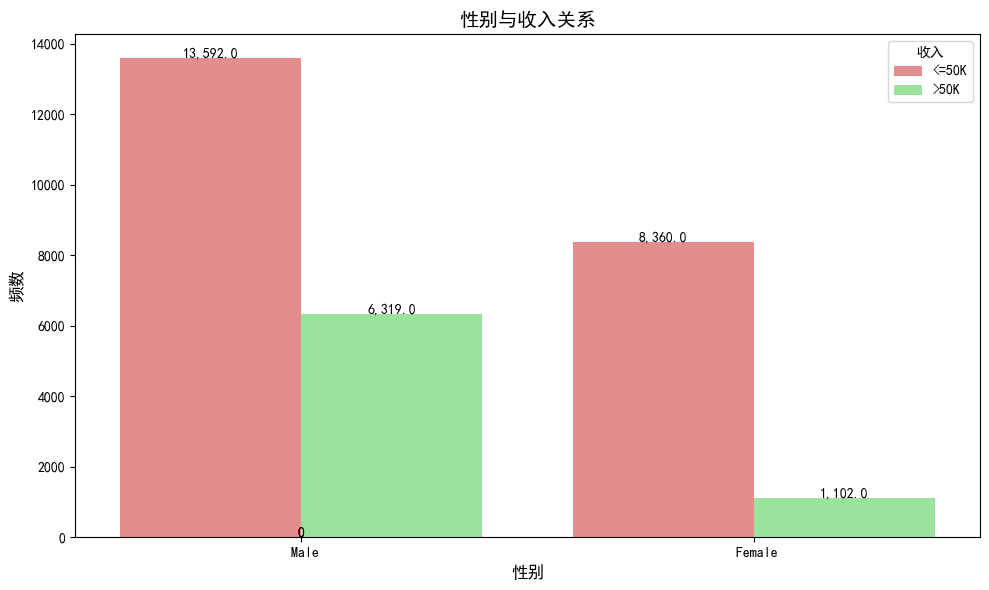

In [11]:
# 额外的EDA: 性别与收入关系
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=df, palette=['lightcoral', 'lightgreen'])
plt.title('性别与收入关系', fontsize=14)
plt.xlabel('性别', fontsize=12)
plt.ylabel('频数', fontsize=12)
plt.legend(title='收入', labels=['<=50K', '>50K'])

# 添加数值标签
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
                   height + 20,
                   '{:,}'.format(height),
                   ha='center')

plt.tight_layout()
plt.savefig('gender_income.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. 特征工程
准备数据用于模型训练，包括特征选择、数据分割和预处理

In [12]:
print("步骤4: 特征工程...")

# 分离特征和目标变量
X = df.drop('income', axis=1)
y = df['income']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"训练集大小: {X_train.shape}, 测试集大小: {X_test.shape}")

步骤4: 特征工程...
训练集大小: (23498, 14), 测试集大小: (5875, 14)


In [13]:
# 定义预处理管道
# 识别数值特征和分类特征
numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 
                        'relationship', 'race', 'sex', 'native_country']

# 数值特征处理管道
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 分类特征处理管道
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 组合预处理步骤
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("预处理管道已创建，准备用于模型训练")

预处理管道已创建，准备用于模型训练


## 5. 模型训练与评估
训练多个机器学习模型并评估其性能

In [14]:
print("步骤5: 模型训练与评估...")

# 初始化模型
models = {
    "逻辑回归": LogisticRegression(max_iter=1000, random_state=42),
    "决策树": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 存储结果
results = {}

步骤5: 模型训练与评估...


模型训练进度:   0%|          | 0/3 [00:00<?, ?it/s]

训练 逻辑回归 模型...
进行 逻辑回归 的5折交叉验证...
逻辑回归 分类报告:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4391
           1       0.74      0.58      0.65      1484

    accuracy                           0.84      5875
   macro avg       0.81      0.76      0.78      5875
weighted avg       0.84      0.84      0.84      5875



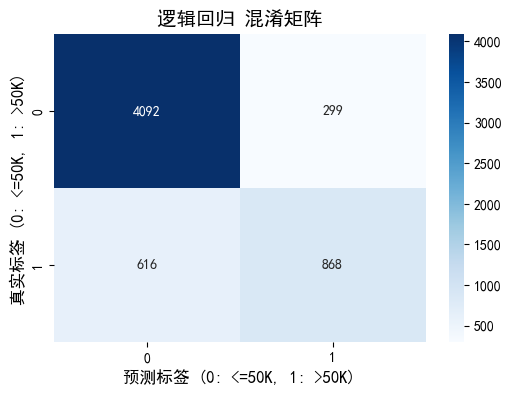

模型训练进度:  33%|███▎      | 1/3 [00:01<00:02,  1.49s/it]

训练 决策树 模型...
进行 决策树 的5折交叉验证...
决策树 分类报告:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4391
           1       0.61      0.60      0.61      1484

    accuracy                           0.80      5875
   macro avg       0.74      0.74      0.74      5875
weighted avg       0.80      0.80      0.80      5875



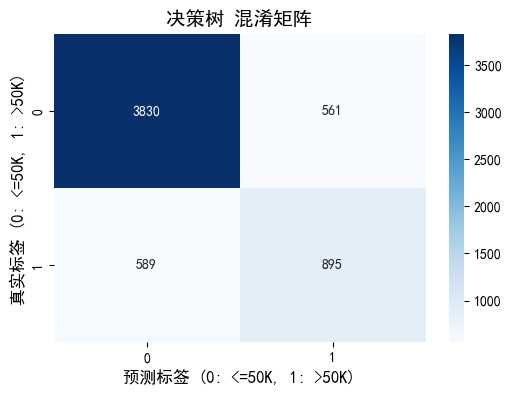

模型训练进度:  67%|██████▋   | 2/3 [00:03<00:01,  1.64s/it]

训练 KNN 模型...
进行 KNN 的5折交叉验证...
KNN 分类报告:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4391
           1       0.69      0.59      0.64      1484

    accuracy                           0.83      5875
   macro avg       0.78      0.75      0.76      5875
weighted avg       0.82      0.83      0.82      5875



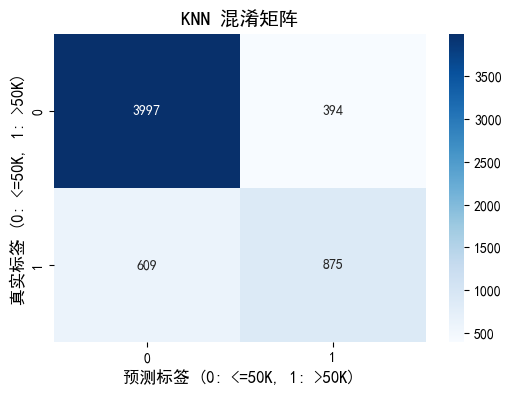

模型训练进度: 100%|██████████| 3/3 [00:08<00:00,  2.72s/it]


In [15]:
# 训练和评估模型
for name, model in tqdm(models.items(), desc="模型训练进度"):
    print(f"训练 {name} 模型...")
    start_time = time.time()
    
    # 创建完整管道
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selector', VarianceThreshold(threshold=0.01)),
        ('classifier', model)
    ])
    
    # 训练模型
    pipeline.fit(X_train, y_train)
    
    # 交叉验证
    print(f"进行 {name} 的5折交叉验证...")
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # 预测
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # 计算指标
    train_time = time.time() - start_time
    results[name] = {
        'model': pipeline,
        'cv_mean_accuracy': np.mean(cv_scores),
        'cv_std_accuracy': np.std(cv_scores),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        'train_time': train_time
    }
    
    # 输出分类报告
    print(f"{name} 分类报告:")
    print(classification_report(y_test, y_pred))
    
    # 混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} 混淆矩阵', fontsize=14)
    plt.xlabel('预测标签 (0: <=50K, 1: >50K)', fontsize=12)
    plt.ylabel('真实标签 (0: <=50K, 1: >50K)', fontsize=12)
    plt.savefig(f'confusion_matrix_{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

## 6. 模型结果比较
比较不同模型的性能指标

In [16]:
print("步骤6: 模型结果比较...")

# 创建性能比较表格
results_df = pd.DataFrame(results).T
print("模型性能比较:")
performance_df = results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'train_time']]
performance_df

步骤6: 模型结果比较...
模型性能比较:


,accuracy,precision,recall,f1,roc_auc,train_time
逻辑回归,0.844255,0.743787,0.584906,0.654847,0.904864,1.303767
决策树,0.804255,0.614698,0.6031,0.608844,0.737669,1.533763
KNN,0.829277,0.689519,0.589623,0.63567,0.857528,4.681638


<Figure size 1200x800 with 0 Axes>

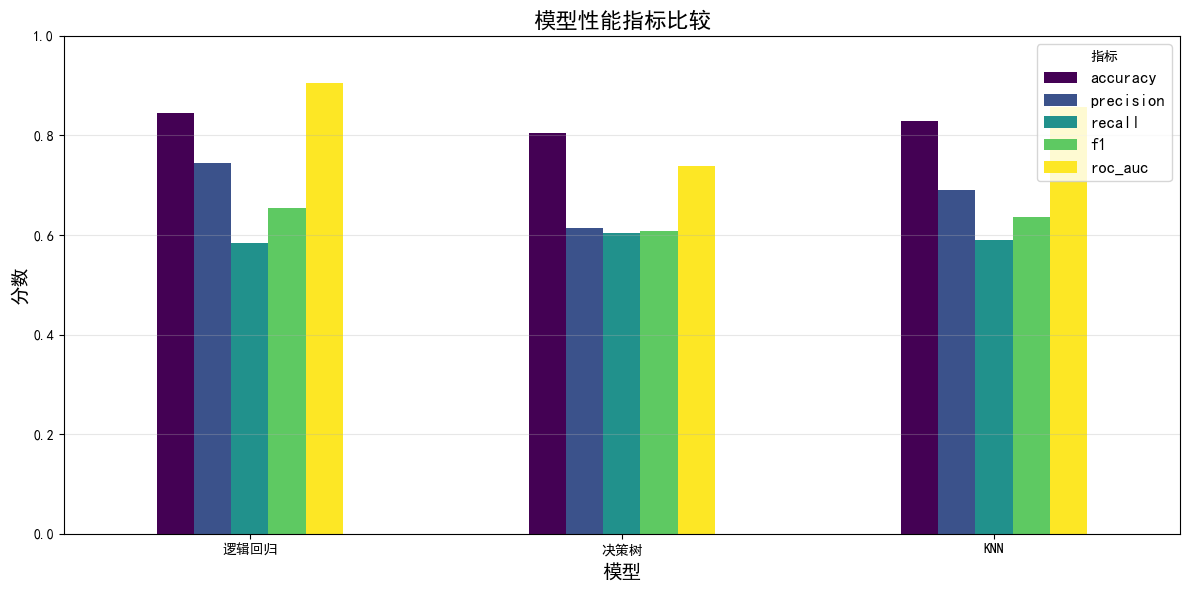

In [17]:
# 可视化模型性能比较
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

plt.figure(figsize=(12, 8))
performance_df[metrics].plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('模型性能指标比较', fontsize=16)
plt.xlabel('模型', fontsize=14)
plt.ylabel('分数', fontsize=14)
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='指标', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

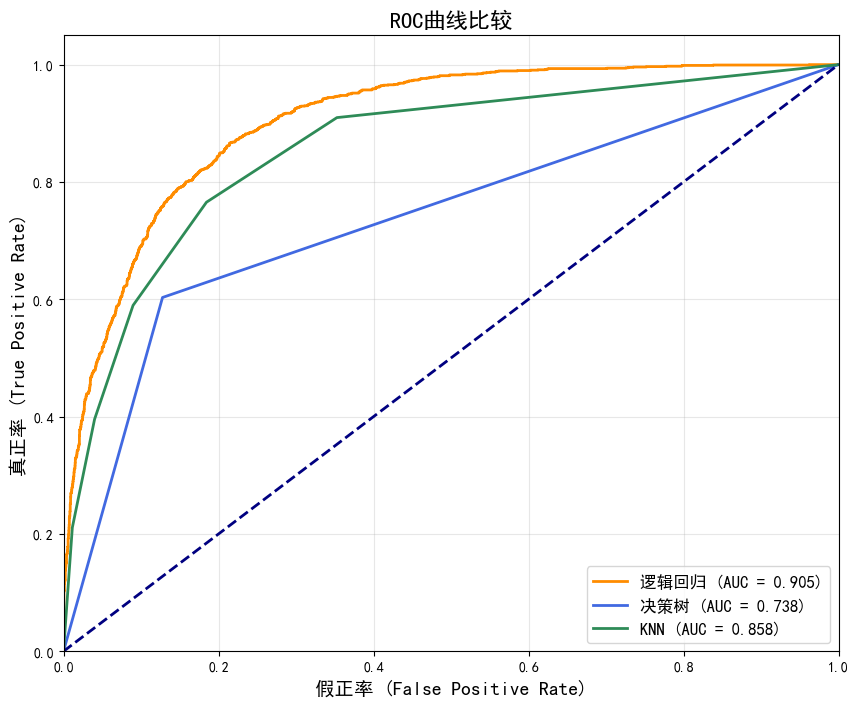

In [18]:
# ROC曲线比较
plt.figure(figsize=(10, 8))
colors = ['#FF8C00', '#4169E1', '#2E8B57']  # 自定义颜色

for (name, res), color in zip(results.items(), colors):
    if res['roc_auc'] is not None:
        fpr, tpr, _ = roc_curve(y_test, res['model'].predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率 (False Positive Rate)', fontsize=14)
plt.ylabel('真正率 (True Positive Rate)', fontsize=14)
plt.title('ROC曲线比较', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. 模型优化
使用网格搜索找到最佳超参数

In [19]:
print("步骤7: 模型优化...")

# 逻辑回归优化
print("优化逻辑回归模型...")
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', VarianceThreshold(threshold=0.01)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print(f"最佳参数: {grid_lr.best_params_}")
print(f"最佳交叉验证准确率: {grid_lr.best_score_:.4f}")

步骤7: 模型优化...
优化逻辑回归模型...
最佳参数: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
最佳交叉验证准确率: 0.8460


In [20]:
# 决策树优化
print("优化决策树模型...")
param_grid_dt = {
    'classifier__max_depth': [5, 10, 15, 20, 25, 30, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10]
}

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', VarianceThreshold(threshold=0.01)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

grid_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print(f"最佳参数: {grid_dt.best_params_}")
print(f"最佳交叉验证准确率: {grid_dt.best_score_:.4f}")

优化决策树模型...
最佳参数: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2}
最佳交叉验证准确率: 0.8472


In [21]:
# KNN优化
print("优化KNN模型...")
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', VarianceThreshold(threshold=0.01)),
    ('classifier', KNeighborsClassifier())
])

grid_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print(f"最佳参数: {grid_knn.best_params_}")
print(f"最佳交叉验证准确率: {grid_knn.best_score_:.4f}")

优化KNN模型...
最佳参数: {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'uniform'}
最佳交叉验证准确率: 0.8319


## 8. 优化后模型评估
评估优化后的模型性能

In [22]:
print("步骤8: 优化后模型评估...")

# 定义优化后的模型
optimized_models = {
    "优化逻辑回归": grid_lr.best_estimator_,
    "优化决策树": grid_dt.best_estimator_,
    "优化KNN": grid_knn.best_estimator_
}

# 存储优化后的结果
optimized_results = {}

步骤8: 优化后模型评估...


In [23]:
# 评估优化后的模型
for name, model in tqdm(optimized_models.items(), desc="优化模型评估进度"):
    print(f"评估 {name} 模型...")
    start_time = time.time()
    
    # 预测
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # 计算指标
    train_time = time.time() - start_time
    optimized_results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'train_time': train_time
    }
    
    # 输出分类报告
    print(f"{name} 分类报告:")
    print(classification_report(y_test, y_pred))

优化模型评估进度:  67%|██████▋   | 2/3 [00:00<00:00, 19.38it/s]

评估 优化逻辑回归 模型...
优化逻辑回归 分类报告:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4391
           1       0.74      0.59      0.65      1484

    accuracy                           0.84      5875
   macro avg       0.81      0.76      0.78      5875
weighted avg       0.84      0.84      0.84      5875

评估 优化决策树 模型...
优化决策树 分类报告:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4391
           1       0.80      0.51      0.62      1484

    accuracy                           0.84      5875
   macro avg       0.83      0.73      0.76      5875
weighted avg       0.84      0.84      0.83      5875

评估 优化KNN 模型...


优化模型评估进度: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

优化KNN 分类报告:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4391
           1       0.72      0.59      0.64      1484

    accuracy                           0.84      5875
   macro avg       0.79      0.75      0.77      5875
weighted avg       0.83      0.84      0.83      5875



In [24]:
# 最终结果比较
final_results_df = pd.DataFrame(optimized_results).T
print("优化后模型性能比较:")
final_results_df

优化后模型性能比较:


,accuracy,precision,recall,f1,roc_auc,train_time
优化逻辑回归,0.844085,0.742735,0.585580,0.654861,0.905254,0.041764
优化决策树,0.843915,0.797482,0.512129,0.623718,0.901017,0.040764
优化KNN,0.836766,0.716406,0.585580,0.644420,0.880588,1.710434


In [25]:
# 优化前后性能对比
# 准备对比数据
original_df = results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
original_df = original_df.rename(index={
    "逻辑回归": "逻辑回归 (原始)",
    "决策树": "决策树 (原始)",
    "KNN": "KNN (原始)"
})

# 合并结果
comparison_df = pd.concat([original_df, final_results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]])
print("优化前后模型性能对比:")
comparison_df

优化前后模型性能对比:


,accuracy,precision,recall,f1,roc_auc
逻辑回归 (原始),0.844255,0.743787,0.584906,0.654847,0.904864
决策树 (原始),0.804255,0.614698,0.6031,0.608844,0.737669
KNN (原始),0.829277,0.689519,0.589623,0.63567,0.857528
优化逻辑回归,0.844085,0.742735,0.58558,0.654861,0.905254
优化决策树,0.843915,0.797482,0.512129,0.623718,0.901017
优化KNN,0.836766,0.716406,0.58558,0.64442,0.880588


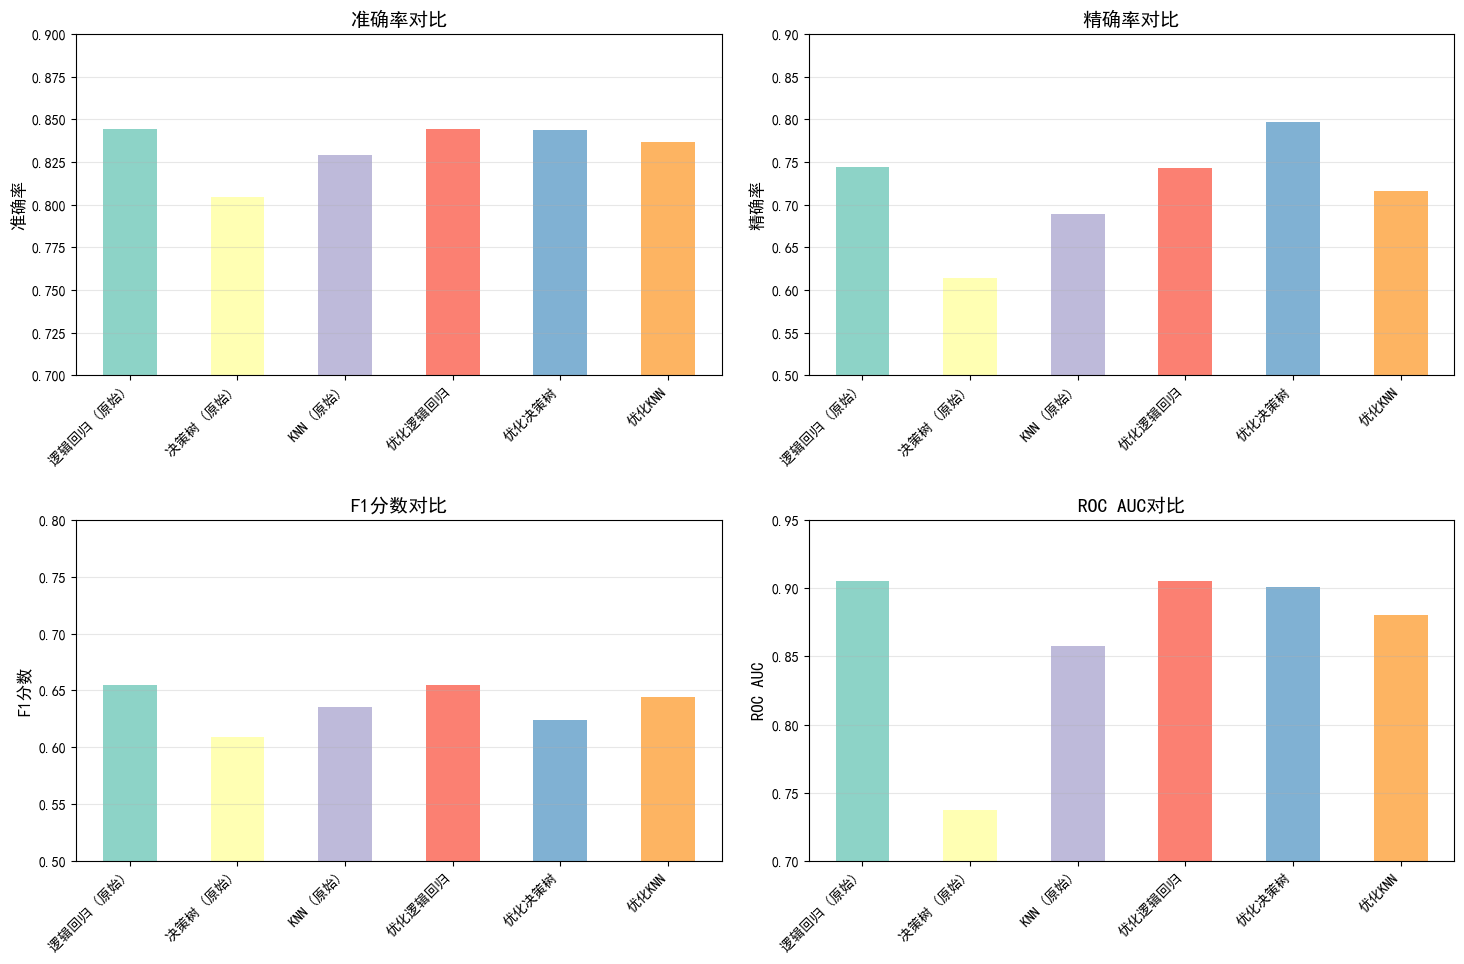

In [26]:
# 可视化优化前后的性能对比
plt.figure(figsize=(15, 10))

# 准确率对比
plt.subplot(2, 2, 1)
comparison_df['accuracy'].plot(kind='bar', color=sns.color_palette("Set3", len(comparison_df)))
plt.title('准确率对比', fontsize=14)
plt.ylabel('准确率', fontsize=12)
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# 精确率对比
plt.subplot(2, 2, 2)
comparison_df['precision'].plot(kind='bar', color=sns.color_palette("Set3", len(comparison_df)))
plt.title('精确率对比', fontsize=14)
plt.ylabel('精确率', fontsize=12)
plt.ylim(0.5, 0.9)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# F1分数对比
plt.subplot(2, 2, 3)
comparison_df['f1'].plot(kind='bar', color=sns.color_palette("Set3", len(comparison_df)))
plt.title('F1分数对比', fontsize=14)
plt.ylabel('F1分数', fontsize=12)
plt.ylim(0.5, 0.8)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# ROC AUC对比
plt.subplot(2, 2, 4)
comparison_df['roc_auc'].plot(kind='bar', color=sns.color_palette("Set3", len(comparison_df)))
plt.title('ROC AUC对比', fontsize=14)
plt.ylabel('ROC AUC', fontsize=12)
plt.ylim(0.7, 0.95)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout(pad=2.0)
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# 保存结果
results_df.to_csv('model_results.csv')
final_results_df.to_csv('optimized_model_results.csv')
print("所有任务完成! 结果已保存到CSV文件。")

所有任务完成! 结果已保存到CSV文件。


## 项目总结

在这个项目中，我们：

1. 加载并预处理了UCI Adult数据集
2. 进行了探索性数据分析，了解了数据分布和特征关系
3. 构建了特征工程管道，处理了数值和分类特征
4. 训练和评估了三种不同的机器学习模型：逻辑回归、决策树和KNN
5. 通过网格搜索优化了模型超参数
6. 比较了优化前后的模型性能

### 主要发现

- 逻辑回归模型在优化后表现最好，具有较高的准确率和AUC值
- 决策树模型在优化后有显著提升
- 教育水平、年龄、工作时长和职业类型是预测收入的重要特征

### 未来工作

- 尝试更多的特征工程方法，如特征交互和多项式特征
- 探索更复杂的模型，如随机森林、梯度提升树和神经网络
- 进行更深入的特征重要性分析
- 处理数据集中的类别不平衡问题